In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from os import path
import glob
sns.set_style('white')
color_scheme = {"Fed": "#648fff","Starved":"#fe6100" }

In [155]:
sample_list = pd.read_csv("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/sample_list.csv",sep=",",header=0)
hemocyte_coordinates = pd.read_csv("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/results/hemocyte_coordinates.csv", sep="\t",header=0)
abdomen_coordinates = pd.read_csv("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/results/abdomen_coordinates.csv", sep="\t",header=0) 
figure_outputs = "/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/results/"

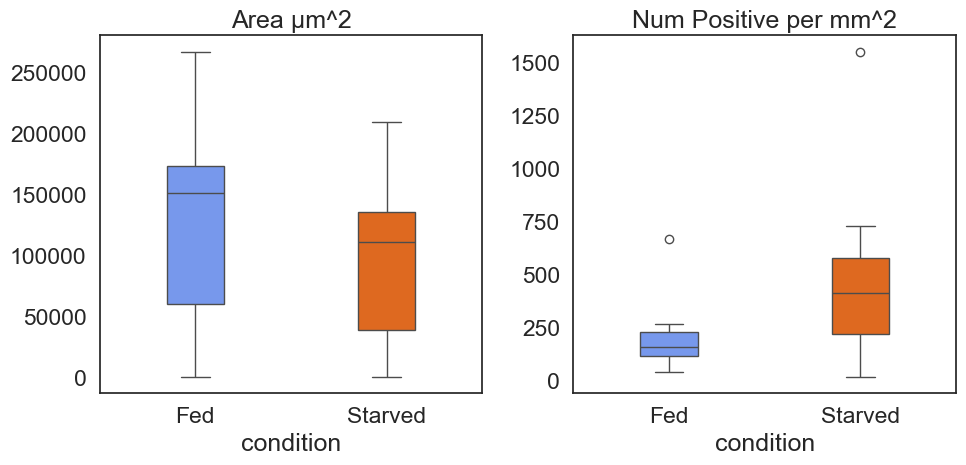

In [156]:
sns.set(font_scale=1.5)
sns.set_style("white")
group_desc = abdomen_coordinates.groupby(['condition']).describe().T

#print(group_desc)

fig, ax = plt.subplots(1,2, figsize=(10,5))


sns.boxplot(data=group_desc.loc['Area µm^2'], ax= ax[0],width=0.3, palette=color_scheme)
ax[0].set_title("Area µm^2")

sns.boxplot(data=group_desc.loc['Num Positive per mm^2'], ax = ax[1],width=0.3,palette=color_scheme)
ax[1].set_title("Num Positive per mm^2")

fig.tight_layout()
fig.savefig(figure_outputs+"annotation_area_numpos.png")


/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_6585/1013596315.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y= np.log10(abdomen_coordinates['Area µm^2']), x= abdomen_coordinates['condition'], ax= ax[0], palette=color_scheme, alpha=0.7)
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_6585/1013596315.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Fed', 'Starved'], rotation=0)
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_6585/1013596315.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticklabels())
/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_6585/10135

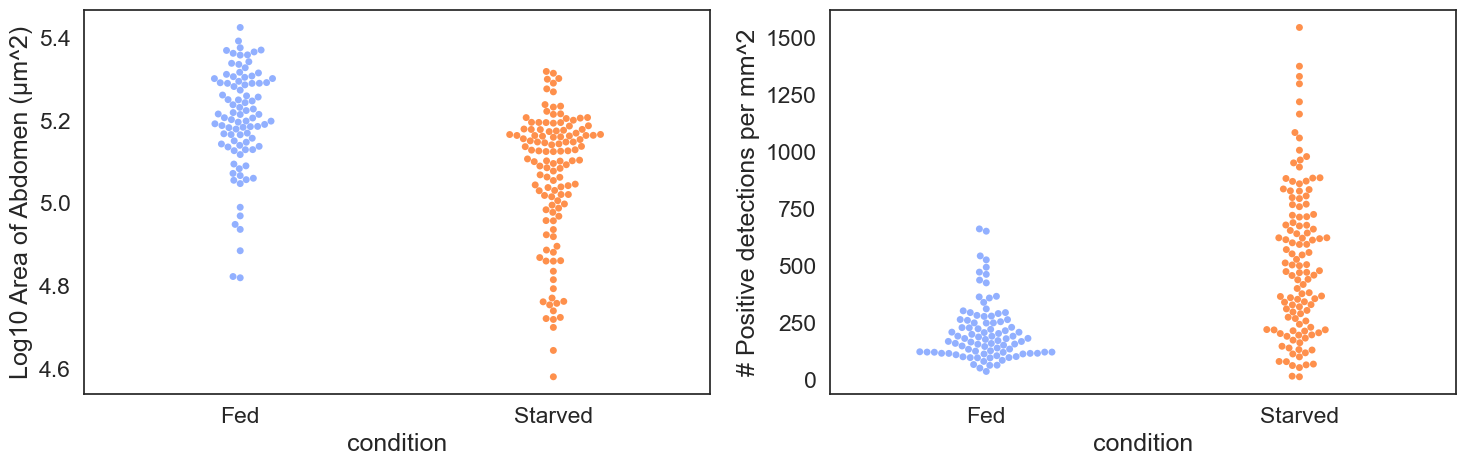

In [157]:
sns.set(font_scale=1.5)
sns.set_style("white")
fig, ax = plt.subplots(1,2, figsize=(15,5))

#sns.violinplot(y= np.log10(abdomen_coordinates['Area µm^2']), x= abdomen_coordinates['condition'], ax= ax[0],inner=None, linewidth = 0)
sns.swarmplot(y= np.log10(abdomen_coordinates['Area µm^2']), x= abdomen_coordinates['condition'], ax= ax[0], palette=color_scheme, alpha=0.7)
ax[0].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[0].set_yticklabels(ax[0].get_yticklabels())
ax[0].set_ylabel("Log10 Area of Abdomen (µm^2)")

#sns.violinplot(y= abdomen_coordinates['Num Positive per mm^2'], x= abdomen_coordinates['condition'], ax = ax[1],inner=None,linewidth = 0)
sns.swarmplot(y= abdomen_coordinates['Num Positive per mm^2'], x= abdomen_coordinates['condition'] , ax= ax[1], palette=color_scheme, alpha=0.7)
ax[1].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[1].set_yticklabels(ax[1].get_yticklabels())
ax[1].set_ylabel("# Positive detections per mm^2")

fig.tight_layout()
fig.savefig(figure_outputs+"annotation_area_numpos_swarm.png")



[Text(0.5, 0, 'Num Positive per mm^2'), Text(0, 0.5, '# Abdomens')]

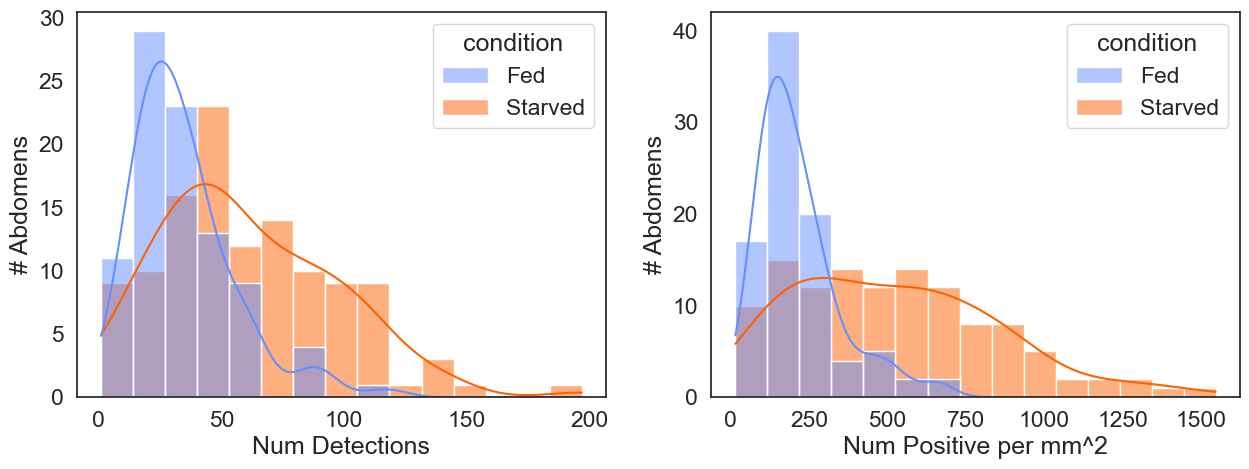

In [158]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data = abdomen_coordinates, 
             x= 'Num Detections', bins=15,kde=True, hue='condition',palette=color_scheme,ax=ax[0])
ax[0].set(xlabel='Num Detections', ylabel='# Abdomens')

sns.histplot(data = abdomen_coordinates, 
             x= 'Num Positive per mm^2', bins=15,kde=True, hue='condition',palette=color_scheme,ax=ax[1])
ax[1].set(xlabel='Num Positive per mm^2', ylabel='# Abdomens')
#fig.savefig(figure_outputs+"annotation_numdetect_dist.png")


In [159]:
#Add experimental group info to hemocyte detections
image_condition = pd.Series(abdomen_coordinates.condition.values, index=abdomen_coordinates.Image).to_dict()
hemocyte_coordinates['condition'] = hemocyte_coordinates['Image'].map(image_condition)

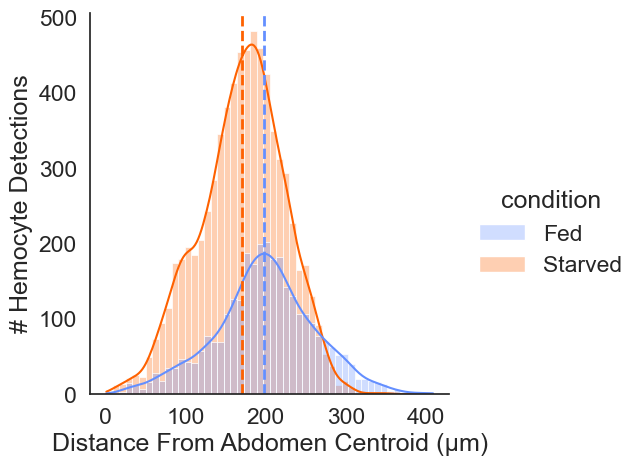

In [160]:

centroid_distance_dist = sns.displot(data=hemocyte_coordinates, x='centroid_distances', hue='condition',kde=True, bins=50,palette=color_scheme, alpha=0.3)
centroid_distance_dist.set(xlabel='Distance From Abdomen Centroid (µm)', ylabel='# Hemocyte Detections')

plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_distances'].mean(),
            color="#648fff",
            ls='--', 
            lw=2)


plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_distances'].mean(),
            color='#fe6100',
            ls='--', 
            lw=2)
#hemocyte_coordinates

In [162]:
hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_distances']

0        197.785775
1        193.785930
2        194.160047
3        194.341619
4        187.746001
            ...    
10300    205.353511
10301    213.678885
10302    213.045090
10303    205.728239
10304    178.838927
Name: centroid_distances, Length: 3105, dtype: float64

In [164]:
import scipy
from scipy.stats import ttest_ind
test_hypothesis = scipy.stats.ttest_ind(hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_distances'], 
                                        hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_distances'], 
                                        axis=0, 
                                        equal_var=False, 
                                        nan_policy='omit', 
                                        alternative='greater', 
                                        trim=0)

print(test_hypothesis)
print(test_hypothesis.pvalue < 0.05)

TtestResult(statistic=21.528511495324988, pvalue=8.992307417278065e-99, df=5103.607446804819)
True


In [166]:
# For each fly, create numpy 3d array of (x,y,z) coordinates and calculate Ripley's L-statistic
hemocyte_coordinates[['fly','section','reporter']] = hemocyte_coordinates['Image'].str.split('_',expand=True)
for fly in hemocyte_coordinates['fly'].unique():
    fly_coords = np.array(hemocyte_coordinates[['centroid_x_zeroscaled','centroid_y_zeroscaled','section']])
    #fig = px.scatter_3d(x=fly_coords[:,0], y=fly_coords[:,1],z=fly_coords[:,2], color=fly_coords[:,2])
    fig = go.Figure(data=[go.Scatter3d(
    x=fly_coords[:,0],
    y=fly_coords[:,1],
    z=fly_coords[:,2].astype(int),
    mode='markers', 
    marker=dict(
        size=2, color= 'darkslategray'
    ))])
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig.show()
    #lstat = ripleys_l(distances_i, support, N, area)
    break